<a href="https://colab.research.google.com/github/aeyjeyaryan/Python_ML/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib

In [ ]:
data = pd.read_excel("Book1.xlsx")
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
X = data.iloc[: ,:-1].values
y=data.iloc[:,-1].values


In [ ]:
imputer =SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(data.iloc[:,1:3])   #iloc [startindexrow:endindexrow, startindexcol:endindexcol]
data.iloc[:,1:3]=imputer.transform(data.iloc[:,1:3])

In [ ]:
data se

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [ ]:
#categorical data
from sklearn.preprocessing import LabelEncoder    # this was on the X and Y we created earlier
labelencoder_X = LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])

In [ ]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, nan],
       [0, 35.0, 58000.0],
       [2, nan, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [ ]:
#simple way for a 1d array
y = labelencoder_X.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
#dummy encoding
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(max_categories = 3)
X = onehotencoder.fit_transform(X).toarray()


In [ ]:
X

array([[1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [ ]:
y   #the code is written above

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

array([[1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [ ]:
X_test

array([[0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0.]])

In [ ]:
y_train

array([1, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
y_test

array([1, 1])

In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 1.        , -0.57735027, -0.57735027, -0.37796447, -0.37796447,
         0.57735027, -0.37796447,  0.        ,  0.37796447],
       [-1.        ,  1.73205081, -0.57735027, -0.37796447, -0.37796447,
         0.57735027, -0.37796447,  0.        ,  0.37796447],
       [-1.        ,  1.73205081, -0.57735027, -0.37796447,  2.64575131,
        -1.73205081, -0.37796447,  0.        ,  0.37796447],
       [-1.        , -0.57735027,  1.73205081, -0.37796447, -0.37796447,
         0.57735027, -0.37796447,  0.        ,  0.37796447],
       [-1.        , -0.57735027,  1.73205081,  2.64575131, -0.37796447,
        -1.73205081,  2.64575131,  0.        , -2.64575131],
       [ 1.        , -0.57735027, -0.57735027, -0.37796447, -0.37796447,
         0.57735027, -0.37796447,  0.        ,  0.37796447],
       [ 1.        , -0.57735027, -0.57735027, -0.37796447, -0.37796447,
         0.57735027, -0.37796447,  0.        ,  0.37796447],
       [ 1.        , -0.57735027, -0.57735027, -0.37796447, -0

In [ ]:
X_test

array([[ 0.,  1., -1.,  0.,  0.,  0.,  0., -1.,  1.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  1., -1.]])

In [ ]:
#working with outliers
lowerlimit = data['Age'].quantile(0.05)
lowerlimit
data[data['Age']<lowerlimit]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes


In [ ]:
upperlimit = data['Age'].quantile(0.95)
upperlimit
data[data['Age']>upperlimit]

,Country,Age,Salary,Purchased
8,Germany,50.0,83000.0,No


In [ ]:
#removing outliers
sett = data[(data['Age']>lowerlimit) & (data["Age"]<upperlimit)]
sett

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
9,France,37.000000,67000.000000,Yes


In [ ]:

cars_data = {
    'Car': ['Toyota Camry', 'Honda Accord', 'Ford Fusion', 'Chevrolet Malibu'],
    'Year': [2022, 2023, 2022, 2023],
    'Color': ['Blue', 'Silver', 'Black', 'Red'],
    'Fuel_Type': ['Gasoline', 'Hybrid', 'Electric', 'Gasoline'],
    'Horsepower': [203, 212, 188, 250],
    'Mileage': [30, 45, 100, 28]
}

cars_data = pd.DataFrame(cars_data)

cars_data

,Car,Year,Color,Fuel_Type,Horsepower,Mileage
0,Toyota Camry,2022,Blue,Gasoline,203,30
1,Honda Accord,2023,Silver,Hybrid,212,45
2,Ford Fusion,2022,Black,Electric,188,100
3,Chevrolet Malibu,2023,Red,Gasoline,250,28


In [ ]:
#ordinal data into numeric values
dataMapping={
    "Blue":4,
    "Silver":3,
    "Black":2,
    "Red":1
}


In [ ]:
cars_data['Colorcode']=cars_data['Color'].map(dataMapping)
cars_data

,Car,Year,Color,Fuel_Type,Horsepower,Mileage,Colorcode
0,Toyota Camry,2022,Blue,Gasoline,203,30,4
1,Honda Accord,2023,Silver,Hybrid,212,45,3
2,Ford Fusion,2022,Black,Electric,188,100,2
3,Chevrolet Malibu,2023,Red,Gasoline,250,28,1


In [ ]:
#exploratory data analysis.
import seaborn as sns
df = pd.read_csv("zomato.csv",encoding="latin-1")

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Cuisines']

<Axes: >

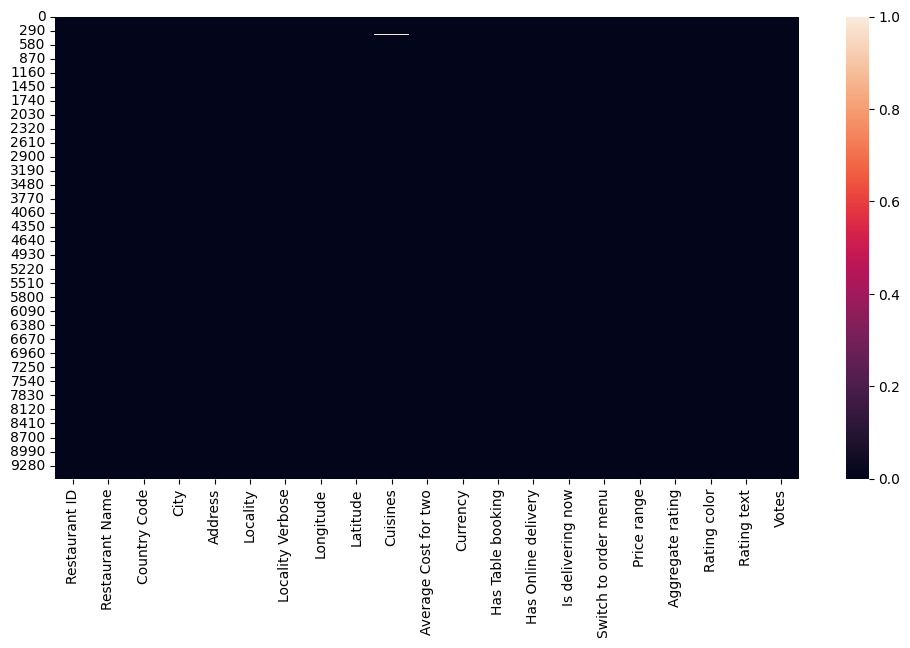

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df_country= pd.read_excel("Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
final=pd.merge(df,df_country,on="Country Code",how="right")
final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [ ]:
final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
country_names=final.Country.value_counts().index

In [ ]:
cont_val=final.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7e8a00b981c0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

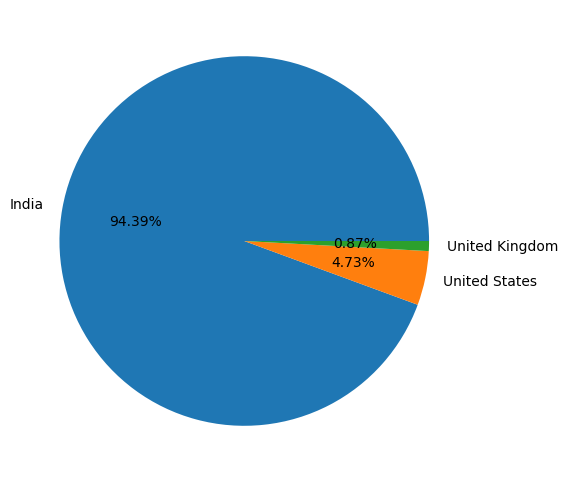

In [ ]:
#pie chart
plt.pie(cont_val[:3],labels=country_names[:3],autopct='%1.2f%%')

In [ ]:
rating=final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

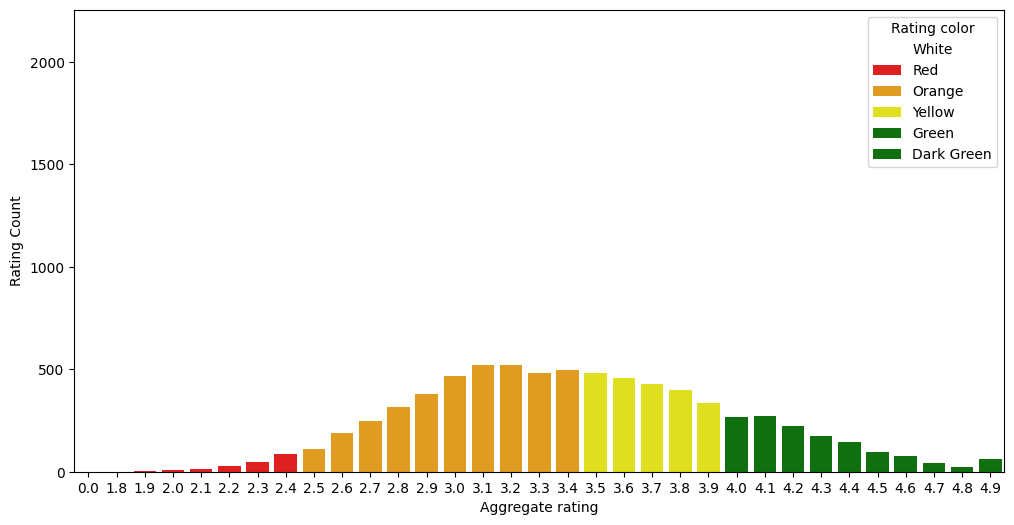

In [ ]:
#to make the figure bigger we use
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=rating,palette=['white','red','orange','yellow','green','green'])

<ipython-input-317-1338d664e96a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color',data=rating,palette=['white','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

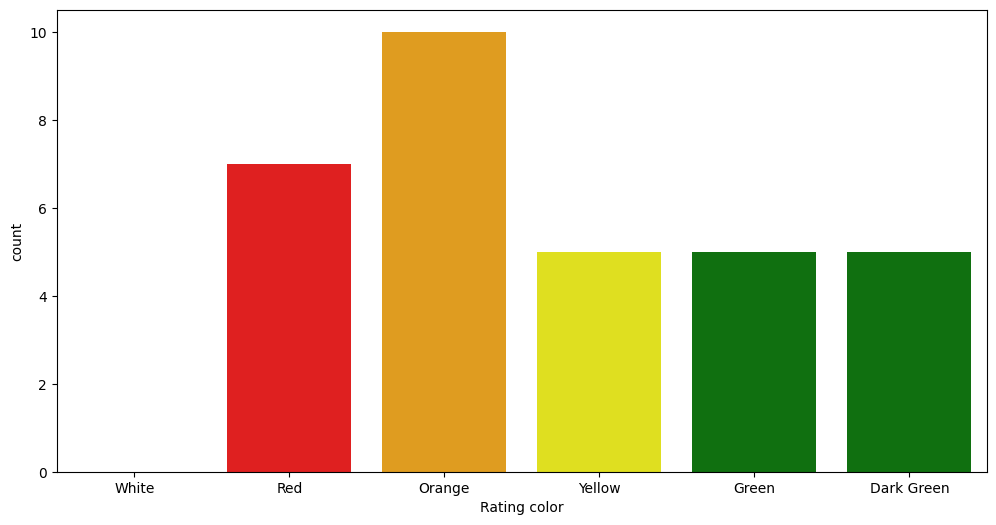

In [ ]:
sns.countplot(x='Rating color',data=rating,palette=['white','red','orange','yellow','green','green'])
#this plot shows the no. of records, white has no records,orange has around 9 etc.

In [ ]:
final[final['Rating color']=='White'].groupby('Country').size().reset_index()

#this block of code first filters the dataset that is final by rating color that has white and then groups them by country and size helps to show number

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
final[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
final[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [ ]:
final[final['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x7e89fd2cad70>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

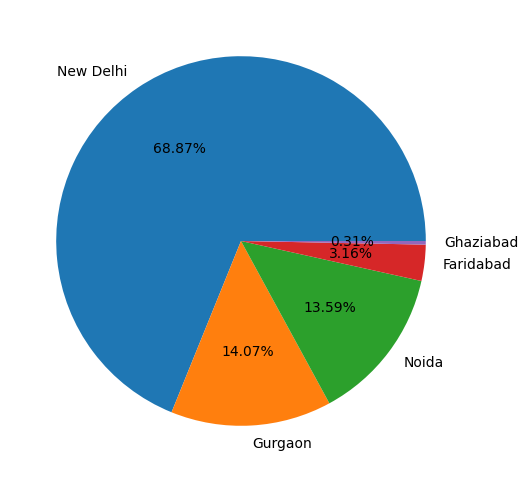

In [ ]:
#pie chart for city distribution
city = final.City.value_counts().values
city_lable = final.City.value_counts().index

plt.pie(city[:5],labels=city_lable[:5],autopct='%1.2f%%')

In [ ]:
#find top 10 cuisines


final[['Country','Cuisines']].groupby(['Country','Cuisines']).size().reset_index()
# final['Cuisine','Country'].groupby('Country').reset_index()

,Country,Cuisines,0
0,Australia,Asian,1
1,Australia,Australian,1
2,Australia,"Bar Food, Modern Australian",1
3,Australia,"Bar Food, Steak",1
4,Australia,"Breakfast, Coffee and Tea",2
...,...,...,...
1983,United States,"Sushi, Teriyaki",1
1984,United States,"Sushi, Thai",1
1985,United States,Tapas,1
1986,United States,Thai,6


([<matplotlib.patches.Wedge at 0x7e89fd3277f0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Fast Food'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Chinese'),
  Text(-0.5935788454809928, -0.9261015895664212, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632158

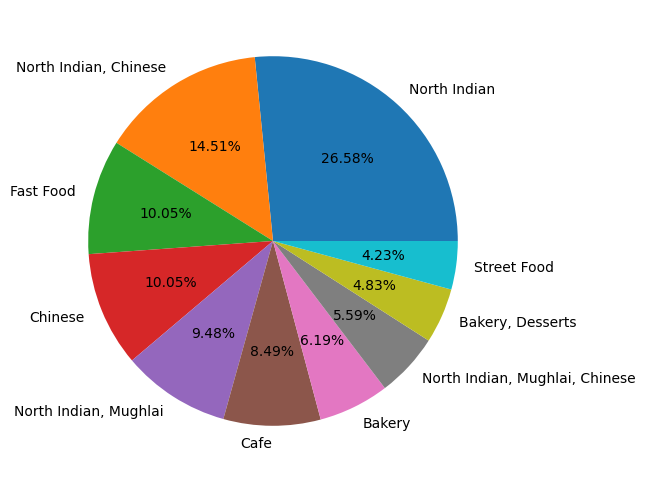

In [ ]:
#pie chart for city distribution
cuisine = final.Cuisines.value_counts().values
cuisine_lable = final.Cuisines.value_counts().index

plt.pie(cuisine[:10],labels=cuisine_lable[:10],autopct='%1.2f%%')

In [ ]:
#black friday sale dataset eda and feature engineering
#cleaning and preparing the data for model training
df_train=pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
fdf = df_train.append(df_test)
#read the warning that says to use pd.concat(df1,df2)

<ipython-input-327-c2cbcddcb915>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf = df_train.append(df_test)


In [ ]:
fdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
fdf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
fdf.drop(["User_ID"],axis=1,inplace=True)

In [ ]:
fdf.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#using datamapping here for category gender
fdf['Gender']=fdf['Gender'].map({'F':0,'M':1})

In [ ]:
#using for age
fdf['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#pd.get_dummies(df['Age'],drop_first=True) can also be used but its a very primitive method
fdf['Age']=fdf['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'55+':6})


In [ ]:
fdf.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6.0,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#fixing categorical for city
# we can also use the same map method but just for knowledge lets use another method
df_city = pd.get_dummies(fdf['City_Category'],drop_first=True)
rdf = pd.concat([fdf,df_city],axis=1)
rdf

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6.0,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3.0,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3.0,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3.0,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5.0,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [ ]:
rdf.drop('City_Category',axis=1,inplace=True) # since we already added the category in the above code we do not need to keep the city category so we dropped it

In [ ]:
rdf.drop('Product_ID',axis=1,inplace=True)

In [ ]:
#handling missing values
rdf.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
rdf['Age'].unique()

array([1., 6., 3., 5., 4., 2.])

In [ ]:
rdf['Age'].mode()[0]

3.0

In [ ]:
rdf['Age']=rdf['Age'].fillna(rdf['Age'].mode()[0])

In [ ]:
rdf.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6.0,16,4+,0,8,8.0,NaN,7969.0,0,1


In [ ]:
rdf['Age'].isnull().sum()

0

In [ ]:
#doing the same for other missing values
rdf['Purchase']=rdf['Purchase'].fillna(rdf['Purchase'].mode()[0])
rdf['Product_Category_2']=rdf['Product_Category_2'].fillna(rdf['Product_Category_2'].mode()[0])
rdf['Product_Category_3']=rdf['Product_Category_3'].fillna(rdf['Product_Category_3'].mode()[0])

In [ ]:
rdf['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
rdf['Stay_In_Current_City_Years']=rdf['Stay_In_Current_City_Years'].str.replace("+","") # we did this to remove that + thing

<ipython-input-373-0babe1e91d22>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rdf['Stay_In_Current_City_Years']=rdf['Stay_In_Current_City_Years'].str.replace("+","") # we did this to remove that + thing


In [ ]:
#conver that stay in current is in string so converting into ints
rdf['Stay_In_Current_City_Years']=rdf['Stay_In_Current_City_Years'].astype(int)

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(2)
memory usage: 67.3+ MB


In [ ]:
#same type conversion for b and c
rdf['B']=rdf['B'].astype(int)
rdf['C']=rdf['C'].astype(int)

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 77.7+ MB


<Axes: xlabel='Occupation', ylabel='Purchase'>

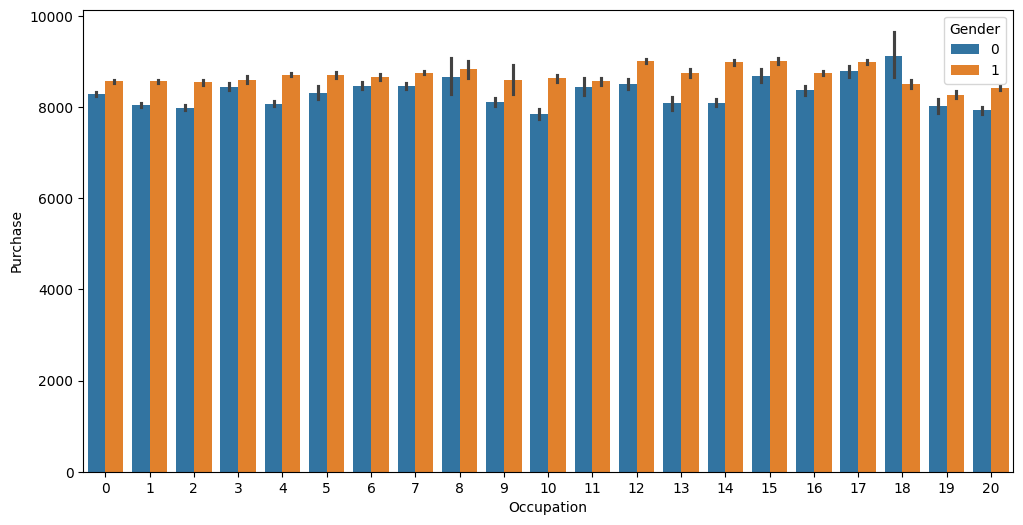

In [ ]:
#visualization

sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=rdf)




<Axes: xlabel='Occupation', ylabel='Purchase'>

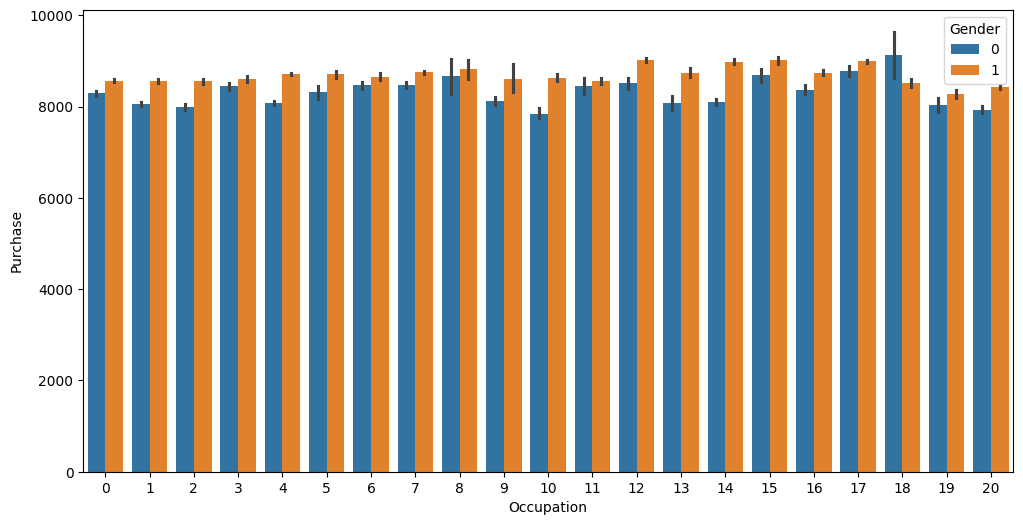

In [ ]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=rdf)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

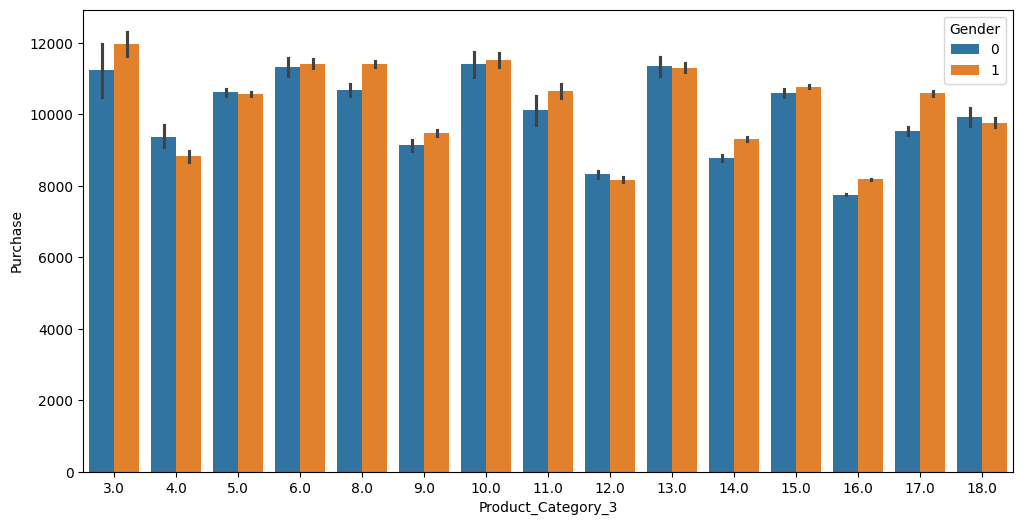

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=rdf)

In [ ]:
#feature scaling
rdf_test=rdf[rdf['Purchase'].isnull()]
rdf_train=rdf[~rdf['Purchase'].isnull()]

In [ ]:
X = rdf_train.drop('Purchase',axis=1)  # with drop we give values of purchase to the dataframe x

In [ ]:
y = rdf_train['Purchase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# Standardization #it brings data into a range of 0 and 1
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print(standardized_data)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
# Normalization  #it brings all the data to a given range so that it might fall under a range like 5 to 15
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [ ]:
#In both cases, we are trying to make things fair and easy to compare. In standardization, we are making sure everyone
#is balanced around a middle point, and in normalization, we are making sure everyone fits within a certain range.
#minmax helps us to adjust data so that every data can fit accordingly without disturbing others